#### Hand Sign Recognition -> It is a MultiClass Classification hence we will be using the MLP as our model architecture

# Imports

In [1]:
from numpy.random import seed
seed(888)
from tensorflow.random import set_seed
set_seed(404)

In [31]:
import os
import numpy as np
import cv2

import tensorflow as tf

from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, BatchNormalization, Flatten
from tensorflow.keras.callbacks import TensorBoard

from time import strftime

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

%matplotlib inline

# Constants

In [24]:
train_dir_alphabets = './Sign-Language-Alphabets-Dataset/asl_alphabet_train/asl_alphabet_train/'
test_dir_alphabets = './Sign-Language-Alphabets-Dataset/asl_alphabet_train/asl_alphabet_train/'
train_dir_digits = './Sign-Language-Digits-Dataset/Dataset/'
test_dir_digits = './Sign-Language-Digits-Dataset/Examples/'

map_idx_to_char = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F',
                  6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L',
                  12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R',
                  18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X',
                  24: 'Y', 25: 'Z', 26: 'del', 27: 'nothing', 28: 'space',
                  29: 'other'}

map_char_to_idx = {v: k for k, v in map_idx_to_char.items()}

classes_alphabet = list(map_idx_to_char.values())

classes_digits = ['0','1','2','3','4','5','6','7','8','9']

IMAGE_WIDTH=64
IMAGE_HEIGHT=64
IMAGE_PIXELS = IMAGE_HEIGHT * IMAGE_WIDTH
COLOR_CHANNELS = 3
TOTAL_INPUTS = IMAGE_PIXELS * COLOR_CHANNELS
NR_CLASSES = len(classes_alphabet)

# A Look At The Data

## The Alphabets

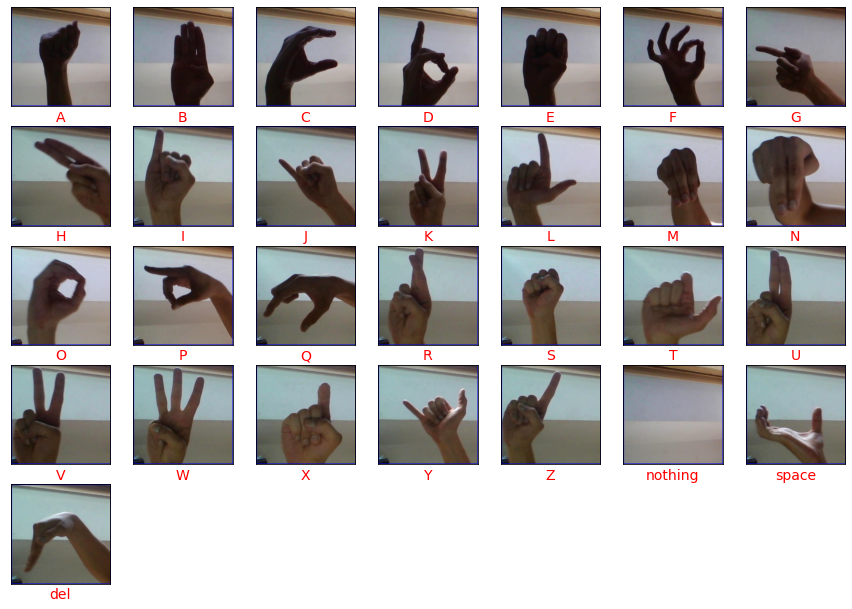

In [4]:
plt.figure(figsize=(15, 15))
for i in range (0,29):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    path = train_dir_alphabets + "/{0}/{0}1.jpg".format(classes_alphabet[i])
    img = plt.imread(path)
    plt.imshow(img)
    label = plt.xlabel(classes_alphabet[i], fontsize=14)
    label.set_color("red")


In [12]:
path = train_dir_alphabets + "/{0}/{0}1.jpg".format(classes_alphabet[0])
img = plt.imread(path)
x, y, c = img.shape
print(f'width = {x} \t| height = {y} \t| channels = {c}')

width = 200 	| height = 200 	| channels = 3


## The Digits

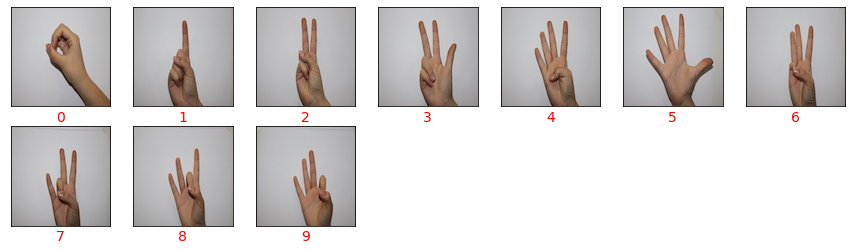

In [5]:
plt.figure(figsize=(15, 15))
for i in range (0,10):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    path = train_dir_digits + "{0}/".format(classes_digits[i])
    data = os.listdir(path)
    path = path + data[0]
    img = plt.imread(path)
    plt.imshow(img)
    label = plt.xlabel(classes_digits[i], fontsize=14)
    label.set_color("red")


#### From the above data it is clear that we cannot have a single model for digits and alphabets as it will create bias due to different number of data points and some alphabets are too similar to some digits

# Continuing For Alphabets

# Get The Data

In [29]:
def load_data(train_dir_alphabets):
    images = []
    labels = []
    size = IMAGE_HEIGHT,IMAGE_WIDTH
    for directory in os.listdir(train_dir_alphabets):
        for image in os.listdir(train_dir_alphabets + "/" + directory):
            img = cv2.imread(train_dir_alphabets + '/' + directory + '/' + image)
            final_img = cv2.resize(img, size)
            images.append(final_img)
            idx = map_char_to_idx.get(directory)
            labels.append(idx)
        print('loaded:', directory, 'label:', idx)
    images = np.array(images)
    labels = utils.to_categorical(labels)
    
    return images,labels

In [30]:
%%time

images,labels = load_data(train_dir_alphabets)
nr_images, x, y, c = images.shape
print(f'images = {nr_images} \t| width = {x} \t| height = {y} \t| channels = {c}')

loaded: A label: 0
loaded: B label: 1
loaded: C label: 2
loaded: D label: 3
loaded: del label: 26
loaded: E label: 4
loaded: F label: 5
loaded: G label: 6
loaded: H label: 7
loaded: I label: 8
loaded: J label: 9
loaded: K label: 10
loaded: L label: 11
loaded: M label: 12
loaded: N label: 13
loaded: nothing label: 27
loaded: O label: 14
loaded: P label: 15
loaded: Q label: 16
loaded: R label: 17
loaded: S label: 18
loaded: space label: 28
loaded: T label: 19
loaded: U label: 20
loaded: V label: 21
loaded: W label: 22
loaded: X label: 23
loaded: Y label: 24
loaded: Z label: 25
images = 87000 	| width = 64 	| height = 64 	| channels = 3
Wall time: 2min 55s


# Exlpore The Data

# Data Preprocessing 

# Tensorflow Architecture Setup

# Tensorboard Setup